In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('olx.csv')

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
print('The size of Dataframe is: ', df.shape)
print('\n')
df.info()

The size of Dataframe is:  (301, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
def missing_data(data):
    ttl = data.isnull().sum().sort_values(ascending = False)
    prcnt = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([ttl, prcnt], axis=1, keys=['Total', 'Percent'])

In [5]:
missing_data(data= df)

,Total,Percent
Car_Name,0,0.0
Year,0,0.0
Selling_Price,0,0.0
Present_Price,0,0.0
Kms_Driven,0,0.0
Fuel_Type,0,0.0
Seller_Type,0,0.0
Transmission,0,0.0
Owner,0,0.0


In [6]:
print("'Fuel_Type' variable have {} unique category : {}\n".format(df['Fuel_Type'].nunique(), df['Fuel_Type'].unique()))
print("'Seller_Type' variable have {} unique category : {}\n".format(df['Seller_Type'].nunique(), \
                                                                     df['Seller_Type'].unique()))
print("'Transmission' variable have {} unique category : {}\n".format(df['Transmission'].nunique(), \
                                                                    df['Transmission'].unique()))
print("'Owner' variable have {} unique category : {}".format(df['Owner'].nunique(), df['Owner'].unique()))

'Fuel_Type' variable have 3 unique category : ['Petrol' 'Diesel' 'CNG']

'Seller_Type' variable have 2 unique category : ['Dealer' 'Individual']

'Transmission' variable have 2 unique category : ['Manual' 'Automatic']

'Owner' variable have 3 unique category : [0 1 3]


In [7]:
df['Owner'].replace(to_replace=3, value=2, inplace= True)
print("'Owner' variable have {} unique category : {}".format(df['Owner'].nunique(), df['Owner'].unique()))

'Owner' variable have 3 unique category : [0 1 2]


In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.039867
std,2.891554,5.082812,8.644115,38886.883882,0.212302
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000


In [9]:
df.describe(include= 'object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [10]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
df['Current_Year'] = 2020
df['No_of_Years'] = df['Current_Year'] - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [12]:
final_df = df.copy() 
final_df.drop(labels= ['Car_Name','Year', 'Current_Year'], axis= 1, inplace= True)
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


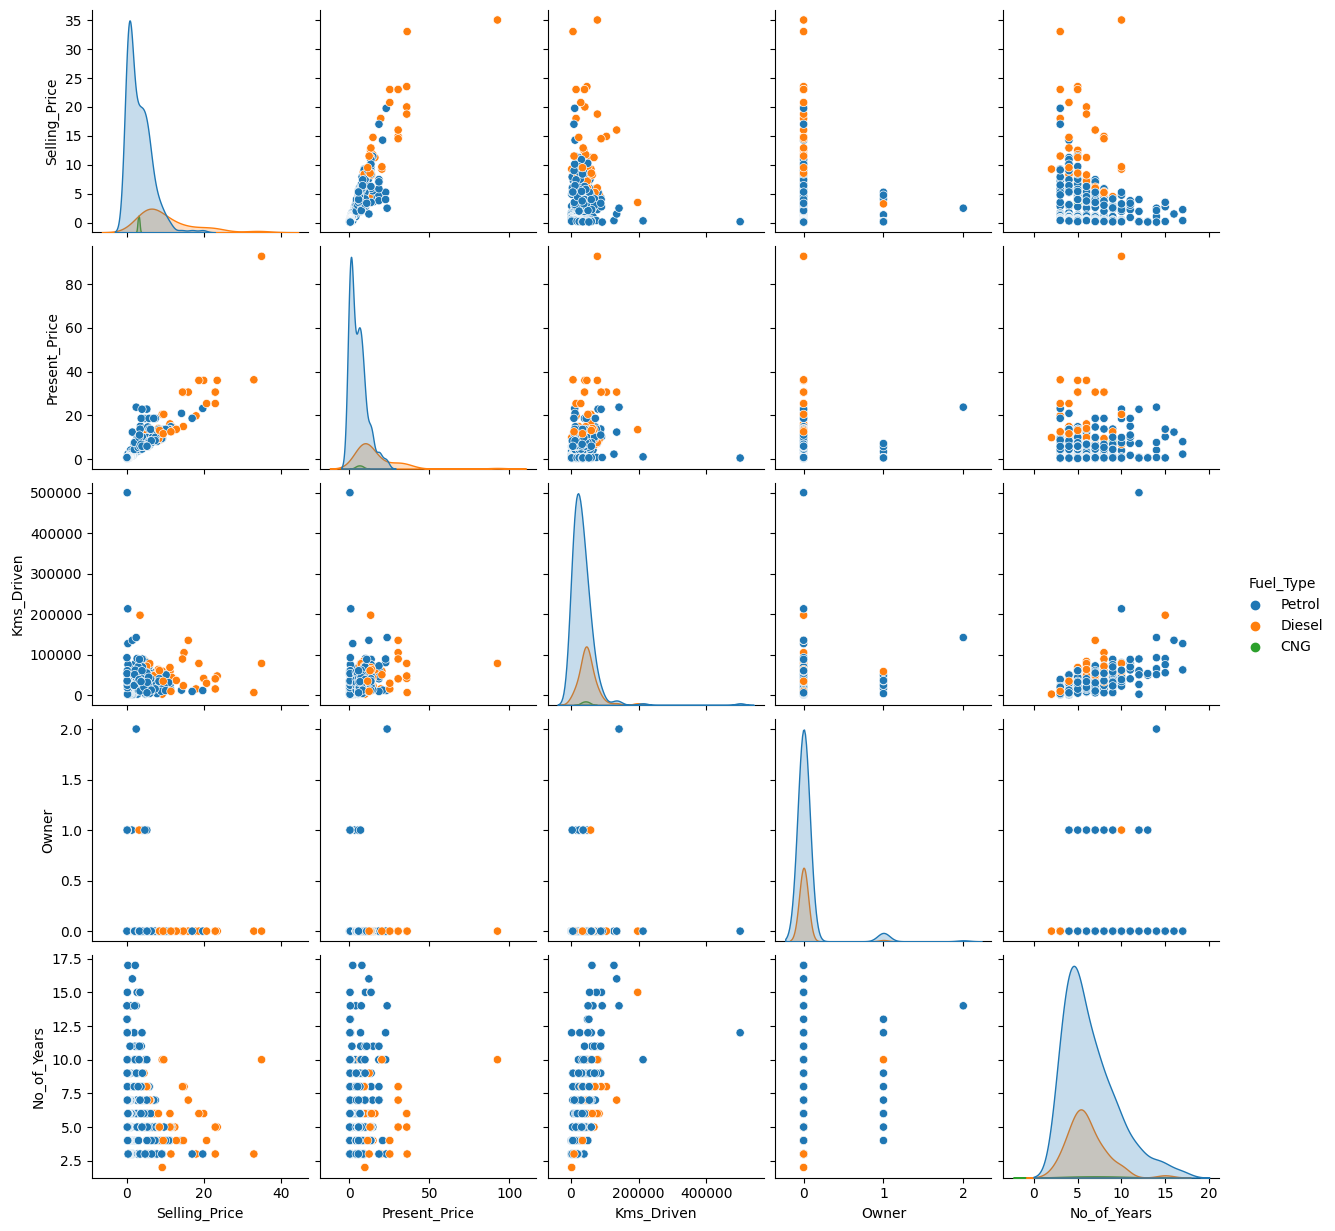

In [13]:
sns.pairplot(data= final_df, hue= 'Fuel_Type', diag_kind= 'kde')

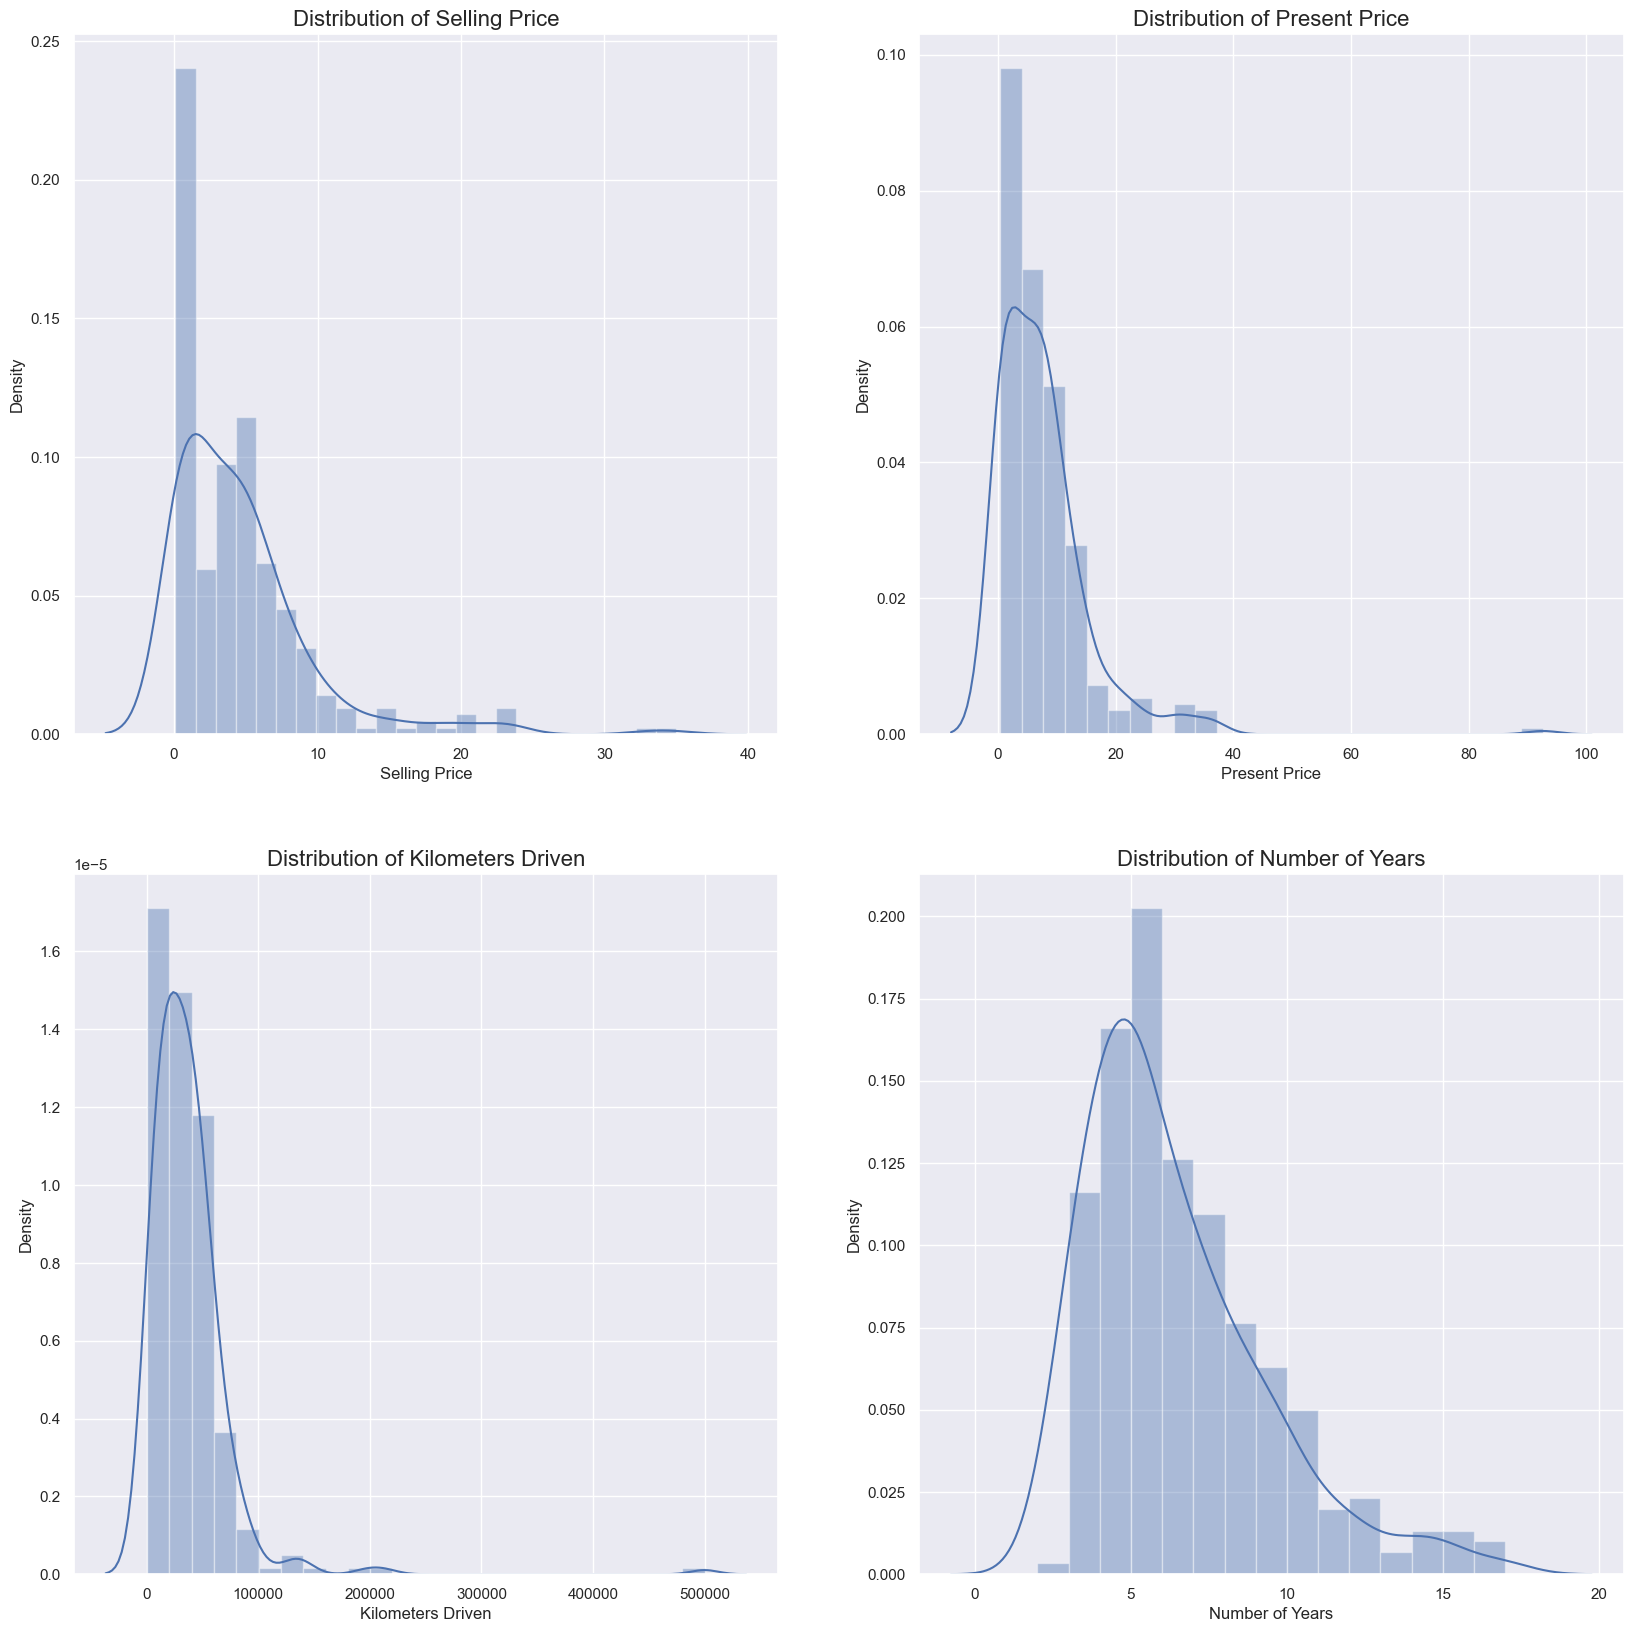

In [14]:
fig = plt.figure(figsize=(20,20))

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2) 
ax2 = fig.add_subplot(2, 2, 3) 
ax3 = fig.add_subplot(2, 2, 4) 

k1 = sns.distplot(a = final_df['Selling_Price'], bins= 25, ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Selling Price', fontsize=16)
ax0.set(xlabel= 'Selling Price', ylabel= 'Density')

k2 = sns.distplot(a = final_df['Present_Price'], bins= 25, ax=ax1) # add to subplot 2           
ax1.set_title('Distribution of Present Price', fontsize=16)
ax1.set(xlabel= 'Present Price', ylabel= 'Density')

k1 = sns.distplot(a = final_df['Kms_Driven'], bins= 25, ax=ax2) # add to subplot 3
ax2.set_title('Distribution of Kilometers Driven', fontsize=16)
ax2.set(xlabel= 'Kilometers Driven', ylabel= 'Density')

k1 = sns.distplot(a = final_df['No_of_Years'], bins= 15, ax=ax3) # add to subplot 4
ax3.set_title('Distribution of Number of Years', fontsize=16)
ax3.set(xlabel= 'Number of Years', ylabel= 'Density')

plt.show()

In [15]:
print("'No_of_Years' variable have {} unique category : {}".format(final_df['No_of_Years'].nunique(), 
                                                                   final_df['No_of_Years'].unique()))

'No_of_Years' variable have 16 unique category : [ 6  7  3  9  2  5  4 11 10  8 17 12 14 15 16 13]


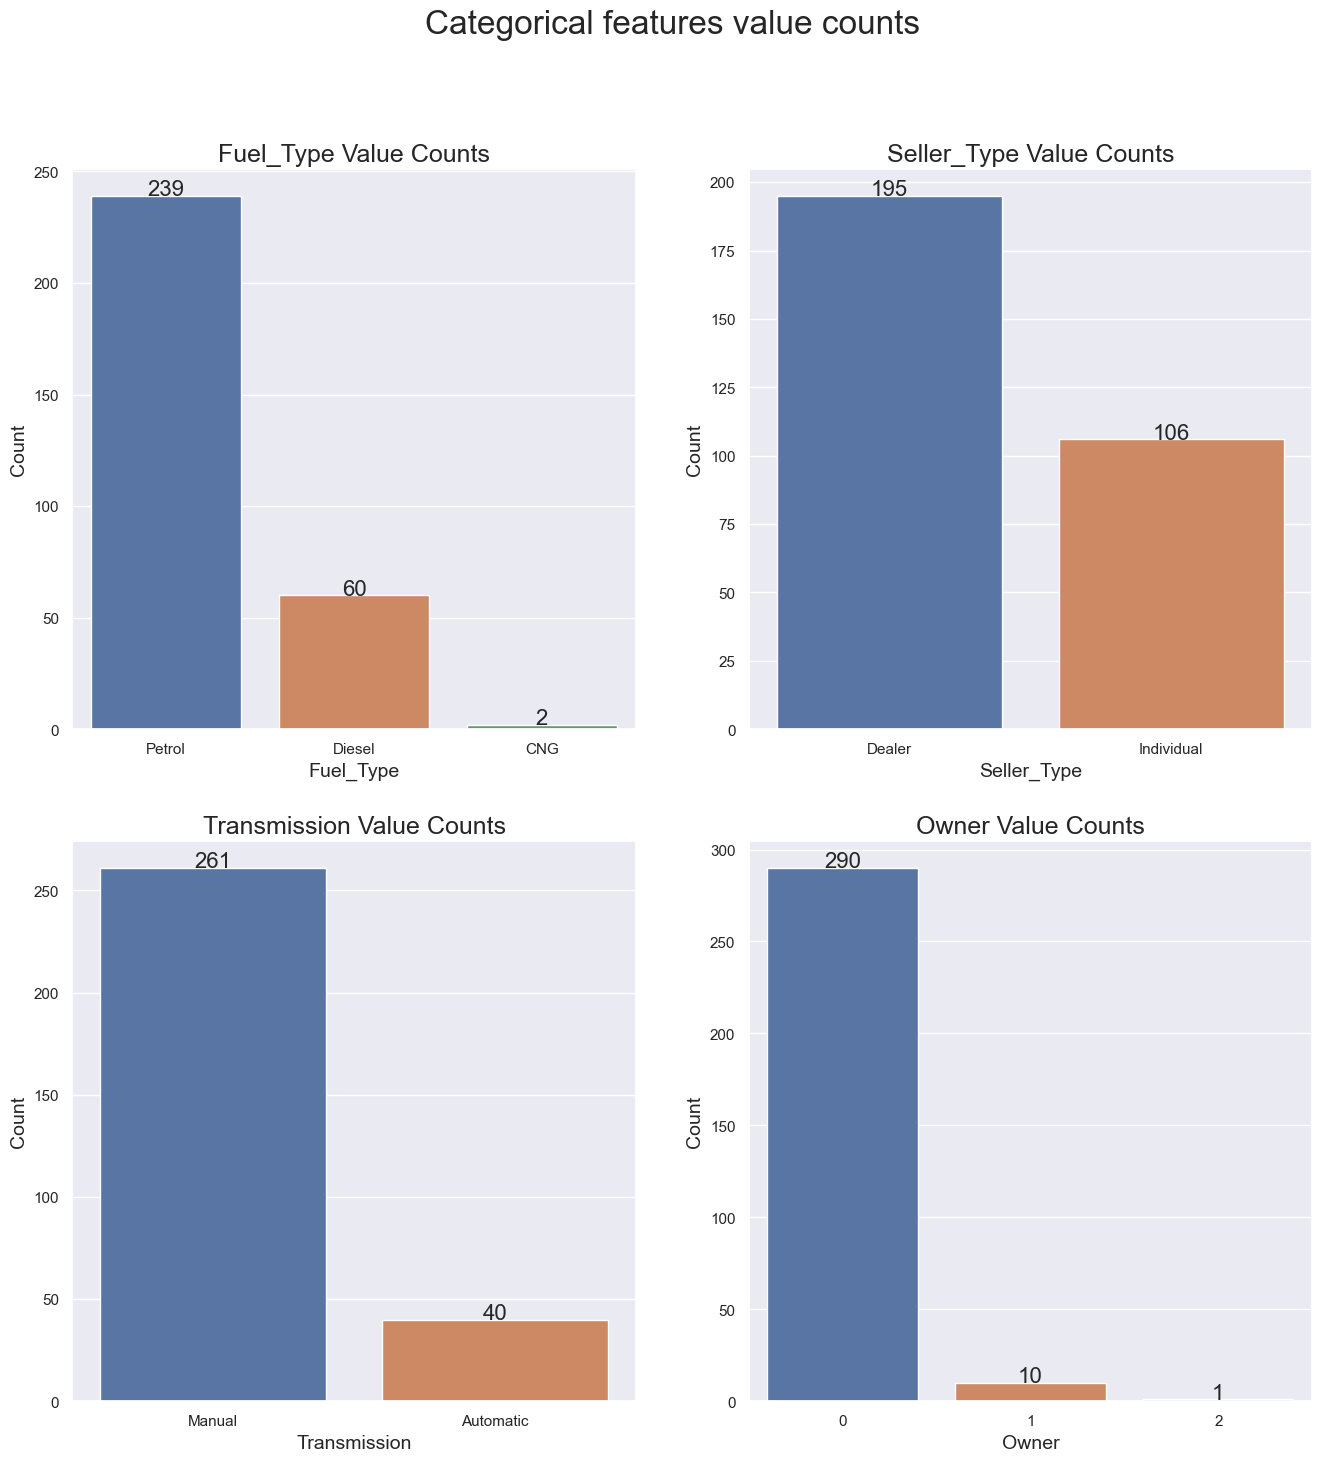

In [16]:
cat_col = list(final_df.columns[3:7])

fig = plt.figure(figsize= (16,16))
plt.suptitle('Categorical features value counts', fontsize = 24)
k=0
for i in range(1,5):
    ax = fig.add_subplot(2,2,i) 
    cat_order = final_df[cat_col[k]].value_counts()
    sns.countplot(data = final_df, x = cat_col[k], order = cat_order.index, ax= ax) 
    plt.xlabel(cat_col[k], fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title('{} Value Counts'.format(cat_col[k]), fontsize=18)
    
    for j in range(cat_order.shape[0]):
        count = cat_order[j]
        strt='{}'.format(count)
        plt.text(j,count+0.1,strt,ha='center', fontsize=16)
    k=k+1

Text(0.5, 1.0, 'Number of Years Value Counts')

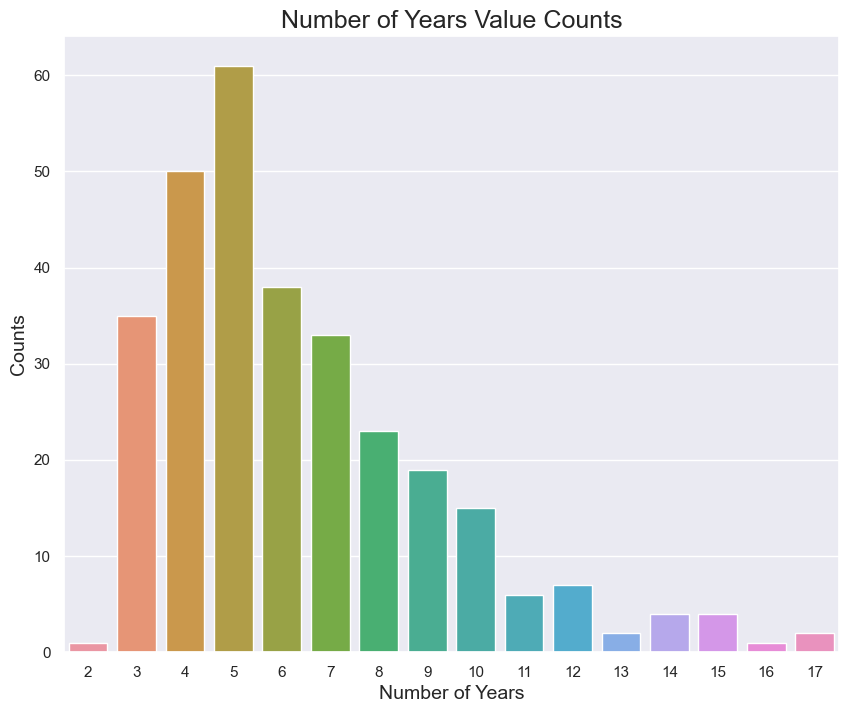

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(data= final_df, x= 'No_of_Years')
plt.xlabel('Number of Years', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Number of Years Value Counts', fontsize=18)

In [18]:
final_df = pd.get_dummies(final_df, drop_first=True)
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,False,True,False,True
1,4.75,9.54,43000,0,7,True,False,False,True
2,7.25,9.85,6900,0,3,False,True,False,True
3,2.85,4.15,5200,0,9,False,True,False,True
4,4.60,6.87,42450,0,6,True,False,False,True


<Axes: >

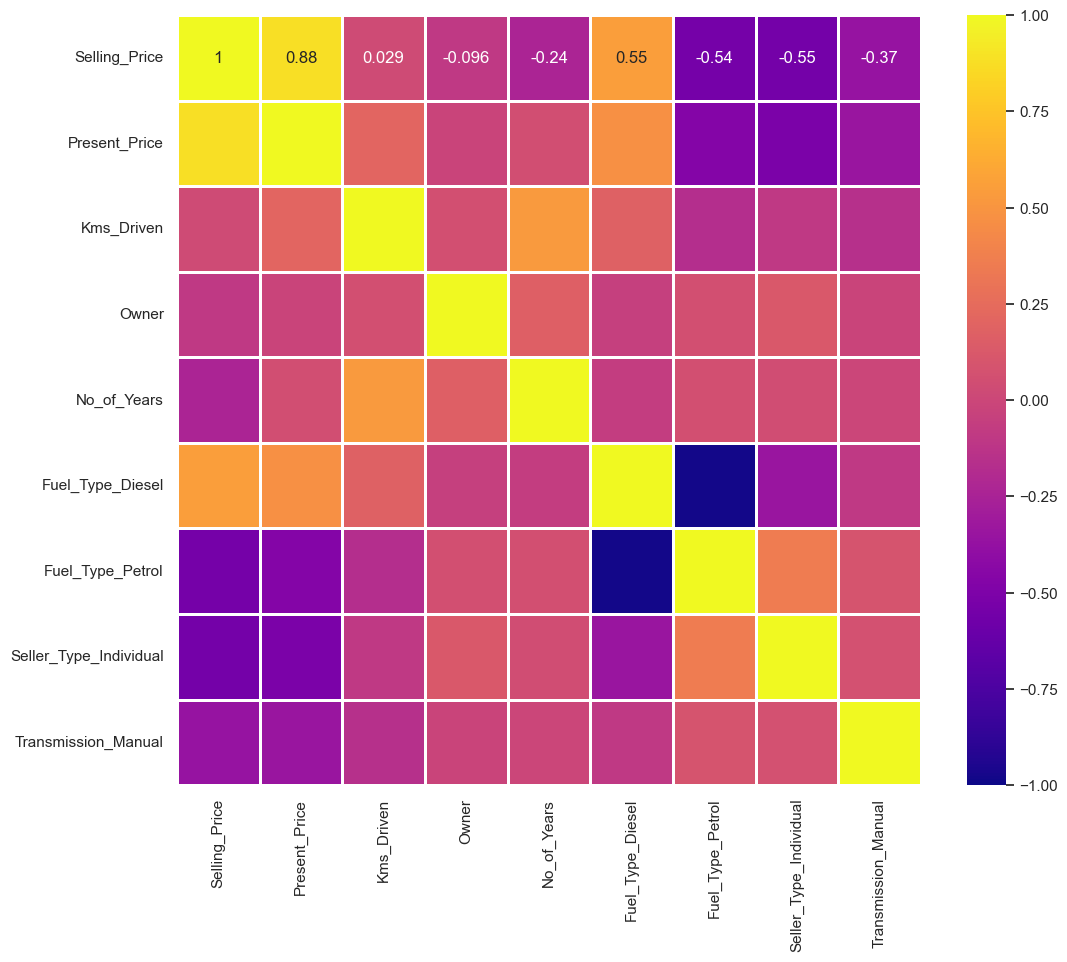

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(data = final_df.corr(), annot= True, cmap= 'plasma', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)

In [20]:
final_df.dtypes

Selling_Price             float64
Present_Price             float64
Kms_Driven                  int64
Owner                       int64
No_of_Years                 int64
Fuel_Type_Diesel             bool
Fuel_Type_Petrol             bool
Seller_Type_Individual       bool
Transmission_Manual          bool
dtype: object

In [21]:
final_df['Fuel_Type_Diesel'] = final_df['Fuel_Type_Diesel'].astype('int64')
final_df['Fuel_Type_Petrol'] = final_df['Fuel_Type_Petrol'].astype('int64')
final_df['Seller_Type_Individual'] = final_df['Seller_Type_Individual'].astype('int64')
final_df['Transmission_Manual'] = final_df['Transmission_Manual'].astype('int64')

In [22]:
X = final_df.iloc[:, 1:]   
y = final_df.iloc[:, 0] 

In [23]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [24]:
print(model.feature_importances_)

[0.37338907 0.0440254  0.00041534 0.07467407 0.23015109 0.0124575
 0.12926398 0.13562355]


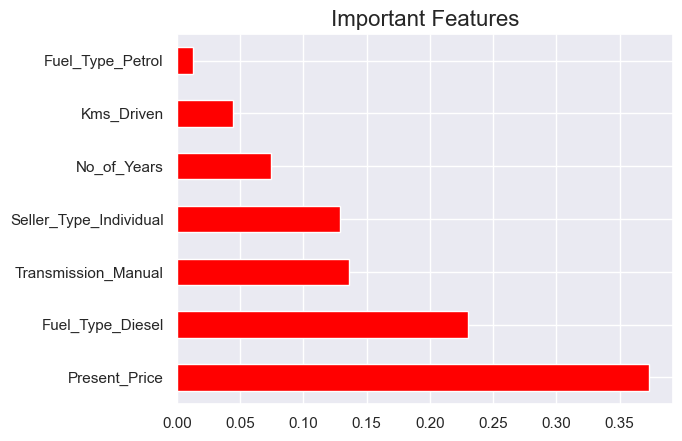

In [25]:
impftre = pd.Series(model.feature_importances_, index = X.columns)
impftre.nlargest(7).plot(kind = 'barh', color='red')
plt.title('Important Features', fontsize=16)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
models = [ LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso]
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= y_test, y_pred= pred))

In [28]:
MLModels_df = pd.DataFrame({"Models": [ 'Linear Regression', 'Support Vector Rregression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Ridge', 'Lasso'],
                           "Mean Squared Error": mse,
                           "Root Mean Squared Error": rmse,
                           "Explained Variance Score": evs,
                           "R-Square Score / Accuracy": r_square_score})

MLModels_df.set_index('Models', inplace=True)
MLModels_df.head()

,Mean Squared Error,Root Mean Squared Error,Explained Variance Score,R-Square Score / Accuracy
Models,,,,
Linear Regression,3.405975,1.845528,0.786824,0.780216
Support Vector Rregression,16.541487,4.067123,0.044145,-0.067405
Decision Tree Regressor,0.760589,0.872117,0.951086,0.950920
Random Forest Regressor,1.265086,1.124761,0.920998,0.918365
Ridge,3.375349,1.837212,0.789172,0.782192


In [29]:
regressor = RandomForestRegressor()

n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(start= 5, stop= 30, num= 6)]

min_samples_split = [2,5,10,15,100]

min_samples_leaf = [1,2,5,10]

In [30]:
random_grid= {'n_estimators': n_estimators, 
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [31]:
regressor_random = RandomizedSearchCV(estimator=  regressor, param_distributions=  random_grid, scoring= 'neg_mean_squared_error', \
                                      n_iter = 10, cv=5, verbose = 2, random_state=42, n_jobs=1)
regressor_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [32]:
y_predictions = regressor_random.predict(X_test)
y_predictions

array([ 4.35035 ,  0.54264 ,  0.64025 ,  0.70959 ,  3.427645,  3.58834 ,
        0.62213 , 11.00519 ,  7.63059 ,  5.5487  ,  5.10564 ,  2.37619 ,
        5.00876 ,  6.48447 ,  5.13294 ,  2.981255,  8.63696 ,  4.55555 ,
        0.23442 ,  0.44937 ,  0.84977 ,  1.07131 ,  4.701795,  5.52278 ,
       19.74807 ,  5.31069 ,  8.71197 ,  5.66545 ,  0.9833  ,  8.9173  ,
        5.72316 ,  1.1953  ,  4.38688 , 10.79375 , 21.93359 ,  5.69883 ,
        0.80719 ,  4.8728  ,  4.736485,  0.59741 ,  8.31467 ,  4.95605 ,
        4.74671 ,  3.68617 ,  6.065395,  7.34775 ,  4.220975,  5.50922 ,
        0.28061 ,  7.4359  ,  3.60428 ,  4.235395,  4.90745 ,  0.61007 ,
        7.82514 ,  7.07564 ,  3.57281 ,  2.52313 ,  5.28996 ,  0.56144 ,
        3.43886 ])

Text(0.5, 1.0, 'True value Vs Predicted values of Selling Price')

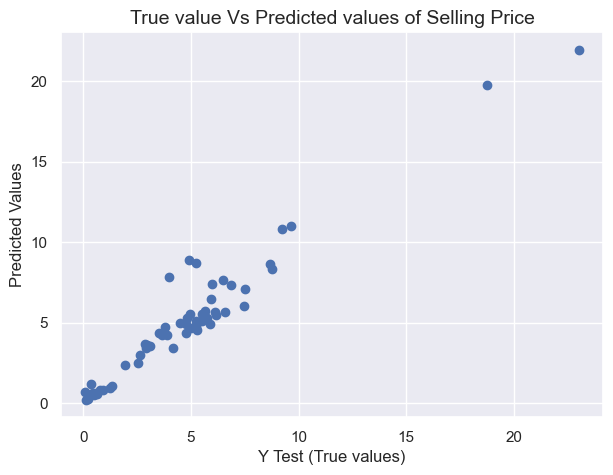

In [33]:
plt.figure(figsize=(7,5))
plt.scatter(x= y_test, y= y_predictions)
plt.xlabel('Y Test (True values)')
plt.ylabel('Predicted Values')
plt.title('True value Vs Predicted values of Selling Price', fontsize=14)

<Axes: xlabel='Selling_Price', ylabel='Density'>

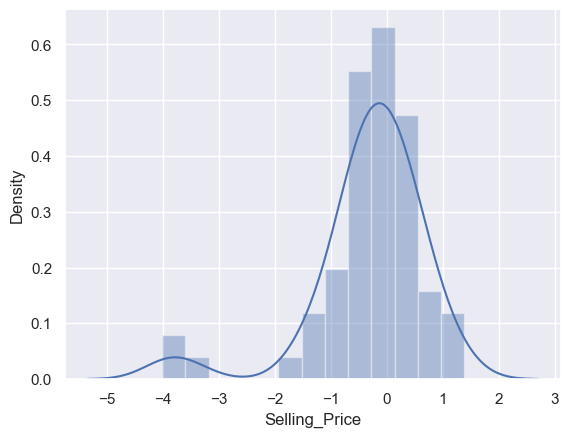

In [34]:
sns.distplot(y_test - y_predictions)

In [35]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_predictions))
print('Mean Squareed Error: ', mean_squared_error(y_test, y_predictions))
print('Root Mean Square Error: ', np.sqrt(mean_squared_error(y_test, y_predictions)))
print('\nExplaned Variance Score: ', explained_variance_score(y_true= y_test, y_pred= y_predictions))

Mean Absolute Error:  0.6693369672131141
Mean Squareed Error:  1.0892854644471353
Root Mean Square Error:  1.0436883943242519

Explaned Variance Score:  0.9358365040076712


In [36]:
print('Accuracy: ', r2_score(y_test, y_predictions))

Accuracy:  0.929709529917844


In [39]:
import pickle
pickle.dump(regressor_random, open('model.pkl','wb'))

